# Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np

# Carregando dados de treinamento e de teste

In [40]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Importando bibliotecas do scikit-learn

## Será usada um modelo de árvore de decisão (random forest)

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [6]:
modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)

In [7]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

## Transformando a variável "Sex", que aparece como texto, em variável binária

In [42]:
def transformar_sexo(valor):
    if valor == 'female':
        return 1
    else:
        return 0

train['Sex_binario'] = train['Sex'].map(transformar_sexo)

In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


## Selecionando as variáveis preditoras (X) e a predita (y)

### Novas variáveis

In [10]:
variaveis = ['Sex_binario', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']

In [11]:
X = train[variaveis]
y = train['Survived']

In [12]:
X.head()

,Sex_binario,Age,Pclass,SibSp,Parch,Fare
0,0,22.0,3,1,0,7.2500
1,1,38.0,1,1,0,71.2833
2,1,26.0,3,0,0,7.9250
3,1,35.0,1,1,0,53.1000
4,0,35.0,3,0,0,8.0500


In [13]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## Convertando dados faltantes (na) em "-1"

In [14]:
X = X.fillna(-1)

## Treinando o modelo

In [15]:
modelo.fit(X, y)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [16]:
test['Sex_binario'] = test['Sex'].map(transformar_sexo)

In [17]:
X_prev = test[variaveis]
X_prev = X_prev.fillna(-1)
X_prev.head()

,Sex_binario,Age,Pclass,SibSp,Parch,Fare
0,0,34.5,3,0,0,7.8292
1,1,47.0,3,1,0,7.0000
2,0,62.0,2,0,0,9.6875
3,0,27.0,3,0,0,8.6625
4,1,22.0,3,1,1,12.2875


## Testando o modelo nos dados de teste

In [18]:
p = modelo.predict(X_prev)
p

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [19]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


## Criar submissão

In [20]:
sub = pd.Series(p, index=test['PassengerId'], name='Survived')

In [21]:
sub.to_csv('primeiro_modelo.csv', header=True)

In [22]:
!head -n10 primeiro_modelo.csv

PassengerId,Survived
892,0
893,0
894,1
895,1
896,0
897,0
898,0
899,0
900,1


# Incluindo validação

## Fazendo o split de treino e validação

In [23]:
np.random.seed(0)
X_treino, X_valid, y_treino, y_valid = train_test_split(X, y, test_size=0.5)

In [24]:
X_treino.head()

,Sex_binario,Age,Pclass,SibSp,Parch,Fare
213,0,30.0,2,0,0,13.0000
586,0,47.0,2,0,0,15.0000
499,0,24.0,3,0,0,7.7958
821,0,27.0,3,0,0,8.6625
246,1,25.0,3,0,0,7.7750


In [25]:
X_treino.shape, X_valid.shape, y_treino.shape, y_valid.shape

((445, 6), (446, 6), (445,), (446,))

In [26]:
modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
modelo.fit(X_treino, y_treino)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [27]:
p = modelo.predict(X_valid)

In [28]:
p.shape

(446,)

In [29]:
np.mean(y_valid == p)

0.7802690582959642

## Comparando com uma solução igual à "gender submission""

In [30]:
p = (X_valid['Sex_binario'] == 1).astype(np.int64)
np.mean(y_valid == p)

0.7825112107623319

## Conclusão: nosso modelo é pior do que a baseline

### O ponto importante da validação é poder comparar com o treino. No entanto, não necessariamente a relação será a mesma ao se aplicar o teste

# Validação Cruzada

In [31]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold

In [32]:
X

,Sex_binario,Age,Pclass,SibSp,Parch,Fare
0,0,22.0,3,1,0,7.2500
1,1,38.0,1,1,0,71.2833
2,1,26.0,3,0,0,7.9250
3,1,35.0,1,1,0,53.1000
4,0,35.0,3,0,0,8.0500
...,...,...,...,...,...,...
886,0,27.0,2,0,0,13.0000
887,1,19.0,1,0,0,30.0000
888,1,-1.0,3,1,2,23.4500
889,0,26.0,1,0,0,30.0000


In [54]:
resultados = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for linhas_treino, linhas_valid in kf.split(X):
    print("Treino:", linhas_treino.shape[0])
    print("Valid:", linhas_valid.shape[0])

    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

    modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
    modelo.fit(X_treino, y_treino)

    p = modelo.predict(X_valid)

    acc = np.mean(y_valid == p)
    resultados.append(acc)
    print("Acc:", acc)
    print()


Treino: 445
Valid: 446
Acc: 0.7869955156950673

Treino: 446
Valid: 445
Acc: 0.7797752808988764

Treino: 445
Valid: 446
Acc: 0.827354260089686

Treino: 446
Valid: 445
Acc: 0.8179775280898877

Treino: 445
Valid: 446
Acc: 0.7847533632286996

Treino: 446
Valid: 445
Acc: 0.7842696629213484

Treino: 445
Valid: 446
Acc: 0.8161434977578476

Treino: 446
Valid: 445
Acc: 0.7842696629213484

Treino: 445
Valid: 446
Acc: 0.8004484304932735

Treino: 446
Valid: 445
Acc: 0.8

Treino: 445
Valid: 446
Acc: 0.8183856502242153

Treino: 446
Valid: 445
Acc: 0.802247191011236

Treino: 445
Valid: 446
Acc: 0.8116591928251121

Treino: 446
Valid: 445
Acc: 0.8067415730337079

Treino: 445
Valid: 446
Acc: 0.820627802690583

Treino: 446
Valid: 445
Acc: 0.7887640449438202

Treino: 445
Valid: 446
Acc: 0.8385650224215246

Treino: 446
Valid: 445
Acc: 0.8044943820224719

Treino: 445
Valid: 446
Acc: 0.7982062780269058

Treino: 446
Valid: 445
Acc: 0.8112359550561797



In [34]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/sergio/opt/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [35]:
np.mean(resultados)

0.8041457147175896

(array([4., 2., 0., 4., 2., 2., 4., 0., 1., 1.]),
 array([0.77977528, 0.78565426, 0.79153323, 0.7974122 , 0.80329118,
        0.80917015, 0.81504913, 0.8209281 , 0.82680707, 0.83268605,
        0.83856502]),
 <a list of 10 Patch objects>)

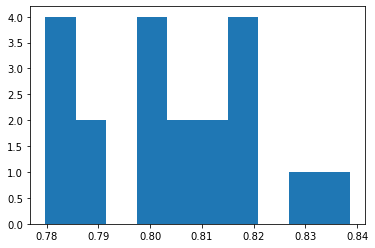

In [36]:
pylab.hist(resultados)

# Retreinar o modelo

In [37]:
X.head()

,Sex_binario,Age,Pclass,SibSp,Parch,Fare
0,0,22.0,3,1,0,7.2500
1,1,38.0,1,1,0,71.2833
2,1,26.0,3,0,0,7.9250
3,1,35.0,1,1,0,53.1000
4,0,35.0,3,0,0,8.0500


In [38]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [44]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train['Sex_binario'] = train['Sex'].map(transformar_sexo)
test['Sex_binario'] = test['Sex'].map(transformar_sexo)

variaveis = ['Sex_binario', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']

X = train[variaveis].fillna(-1)
y = train['Survived']

In [46]:
test[variaveis].head()

,Sex_binario,Age,Pclass,SibSp,Parch,Fare
0,0,34.5,3,0,0,7.8292
1,1,47.0,3,1,0,7.0000
2,0,62.0,2,0,0,9.6875
3,0,27.0,3,0,0,8.6625
4,1,22.0,3,1,1,12.2875


In [47]:
modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
modelo.fit(X, y)

p = modelo.predict(test[variaveis].fillna(-1))

In [48]:
p

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [49]:
sub = pd.Series(p, index=test['PassengerId'], name='Survived')
sub.shape

(418,)

In [50]:
sub.to_csv('modelo_video5.csv', header=True)

In [51]:
!ls

gender_submission.csv              test.csv
modelo_video5.csv                  train.csv
primeiro_modelo.csv                tutorial_titanic_mario_filho.ipynb


In [52]:
!head -n10 modelo_video5.csv

PassengerId,Survived
892,0
893,0
894,1
895,1
896,0
897,0
898,0
899,0
900,1


# Aula 6

In [55]:
X_valid_check = train.iloc[linhas_valid].copy()
X_valid_check['p'] = p
X_valid_check.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario,p
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0


In [56]:
X_valid_check.shape

(445, 14)

In [64]:
erros = X_valid_check[X_valid_check['Survived'] != X_valid_check['p']]
erros = erros[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_binario', 'p', 'Survived']]
erros.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario,p,Survived
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,1
21,22,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,0,0,1
22,23,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q,1,0,1
23,24,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,0,0,1
25,26,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S,1,0,1


In [65]:
mulheres = erros[erros['Sex'] == 'female']
homens = erros[erros['Sex'] == 'male']

In [66]:
mulheres.sort_values("Survived")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario,p,Survived
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,1,0
501,502,3,"Canavan, Miss. Mary",female,21.0,0,0,364846,7.7500,NaN,Q,1,1,0
498,499,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,1,1,0
882,883,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,1,1,0
474,475,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S,1,1,0
419,420,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.1500,NaN,S,1,1,0
357,358,2,"Funk, Miss. Annie Clemmer",female,38.0,0,0,237671,13.0000,NaN,S,1,1,0
254,255,3,"Rosblom, Mrs. Viktor (Helena Wilhelmina)",female,41.0,0,2,370129,20.2125,NaN,S,1,1,0
503,504,3,"Laitinen, Miss. Kristina Sofia",female,37.0,0,0,4135,9.5875,NaN,S,1,1,0
654,655,3,"Hegarty, Miss. Hanora ""Nora""",female,18.0,0,0,365226,6.7500,NaN,Q,1,1,0


In [67]:
homens.sort_values("Survived")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario,p,Survived
238,239,2,"Pengelly, Mr. Frederick William",male,19.00,0,0,28665,10.5000,NaN,S,0,1,0
442,443,3,"Petterson, Mr. Johan Emil",male,25.00,1,0,347076,7.7750,NaN,S,0,1,0
422,423,3,"Zimmerman, Mr. Leo",male,29.00,0,0,315082,7.8750,NaN,S,0,1,0
373,374,1,"Ringhini, Mr. Sante",male,22.00,0,0,PC 17760,135.6333,NaN,C,0,1,0
371,372,3,"Wiklund, Mr. Jakob Alfred",male,18.00,1,0,3101267,6.4958,NaN,S,0,1,0
698,699,1,"Thayer, Mr. John Borland",male,49.00,1,1,17421,110.8833,C68,C,0,1,0
262,263,1,"Taussig, Mr. Emil",male,52.00,1,1,110413,79.6500,E67,S,0,1,0
231,232,3,"Larsson, Mr. Bengt Edvin",male,29.00,0,0,347067,7.7750,NaN,S,0,1,0
214,215,3,"Kiernan, Mr. Philip",male,NaN,1,0,367229,7.7500,NaN,Q,0,1,0
721,722,3,"Jensen, Mr. Svend Lauritz",male,17.00,1,0,350048,7.0542,NaN,S,0,1,0


# Novas variáveis

In [81]:
train['Embarked_S'] = (train['Embarked'] == 'S').astype(int)
train['Embarked_C'] = (train['Embarked'] == 'C').astype(int)
#train['Embarked_Q'] = (train['Embarked'] == 'Q').astype(int)

train['Cabine_nula'] = train['Cabin'].isnull().astype(int)

train['Nome_contem_Miss'] = train['Name'].str.contains("Miss").astype(int)
train['Nome_contem_Mrs'] = train['Name'].str.contains("Mrs").astype(int)
train['Nome_contem_Master'] = train['Name'].str.contains("Master").astype(int)
train['Nome_contem_Col'] = train['Name'].str.contains("Col").astype(int)
train['Nome_contem_Major'] = train['Name'].str.contains("Major").astype(int)
train['Nome_contem_Mr'] = train['Name'].str.contains("Mr").astype(int)


In [82]:
variaveis = ['Sex_binario', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked_S', 'Embarked_C', 'Cabine_nula', 'Nome_contem_Miss',
       'Nome_contem_Mrs', 'Nome_contem_Master', 'Nome_contem_Col',
       'Nome_contem_Major', 'Nome_contem_Mr']
X = train[variaveis].fillna(-1)
y = train['Survived']

In [108]:
from sklearn.linear_model import LogisticRegression

In [109]:
resultados2 = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for linhas_treino, linhas_valid in kf.split(X):
    print("Treino:", linhas_treino.shape[0])
    print("Valid:", linhas_valid.shape[0])

    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

    #modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
    modelo = LogisticRegression()
    modelo.fit(X_treino, y_treino)

    p = modelo.predict(X_valid)

    acc = np.mean(y_valid == p)
    resultados2.append(acc)
    print("Acc:", acc)
    print()


Treino: 445
Valid: 446
Acc: 0.8318385650224215

Treino: 446
Valid: 445
Acc: 0.8067415730337079

Treino: 445
Valid: 446


/Users/sergio/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sergio/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Acc: 0.8116591928251121

Treino: 446
Valid: 445
Acc: 0.802247191011236

Treino: 445
Valid: 446
Acc: 0.8161434977578476

Treino: 446
Valid: 445
Acc: 0.8157303370786517

Treino: 445
Valid: 446


/Users/sergio/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sergio/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Acc: 0.8183856502242153

Treino: 446
Valid: 445
Acc: 0.8089887640449438

Treino: 445
Valid: 446
Acc: 0.8183856502242153

Treino: 446
Valid: 445
Acc: 0.8179775280898877

Treino: 445
Valid: 446


/Users/sergio/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sergio/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Acc: 0.827354260089686

Treino: 446
Valid: 445
Acc: 0.8134831460674158

Treino: 445
Valid: 446
Acc: 0.8408071748878924

Treino: 446
Valid: 445
Acc: 0.8044943820224719

Treino: 445
Valid: 446


/Users/sergio/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sergio/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Acc: 0.8071748878923767

Treino: 446
Valid: 445
Acc: 0.8044943820224719

Treino: 445
Valid: 446
Acc: 0.8340807174887892

Treino: 446
Valid: 445
Acc: 0.8179775280898877

Treino: 445
Valid: 446
Acc: 0.8318385650224215

Treino: 446
Valid: 445
Acc: 0.8269662921348314



/Users/sergio/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sergio/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

((array([3., 3., 2., 2., 4., 0., 2., 2., 1., 1.]),
  array([0.80224719, 0.80610319, 0.80995919, 0.81381519, 0.81767118,
         0.82152718, 0.82538318, 0.82923918, 0.83309518, 0.83695118,
         0.84080717]),
  <a list of 10 Patch objects>),
 (array([ 2.,  6., 20.,  4., 24., 18., 18., 18.,  6.,  4.]),
  array([0.7690583 , 0.77600897, 0.78295964, 0.78991031, 0.79686099,
         0.80381166, 0.81076233, 0.817713  , 0.82466368, 0.83161435,
         0.83856502]),
  <a list of 10 Patch objects>))

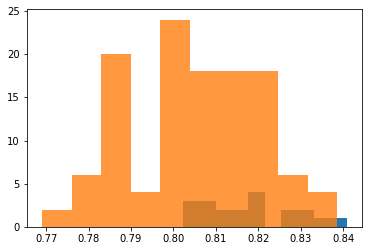

In [110]:
pylab.hist(resultados2), pylab.hist(resultados,alpha=0.8)

In [111]:
np.mean(resultados2)

0.8178384642515241

In [112]:
test['Embarked_S'] = (test['Embarked'] == 'S').astype(int)
test['Embarked_C'] = (test['Embarked'] == 'C').astype(int)
#test['Embarked_Q'] = (test['Embarked'] == 'Q').astype(int)

test['Cabine_nula'] = test['Cabin'].isnull().astype(int)

test['Nome_contem_Miss'] = test['Name'].str.contains("Miss").astype(int)
test['Nome_contem_Mrs'] = test['Name'].str.contains("Mrs").astype(int)
test['Nome_contem_Master'] = test['Name'].str.contains("Master").astype(int)
test['Nome_contem_Col'] = test['Name'].str.contains("Col").astype(int)
test['Nome_contem_Major'] = test['Name'].str.contains("Major").astype(int)
test['Nome_contem_Mr'] = test['Name'].str.contains("Mr").astype(int)

modelo = LogisticRegression()
modelo.fit(X, y)

p = modelo.predict(test[variaveis].fillna(-1))

/Users/sergio/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Criar submissão

In [113]:
sub = pd.Series(p, index=test['PassengerId'], name='Survived')
sub.shape

(418,)

In [114]:
sub.to_csv("modelo_video6_lr.csv", header=True)

In [103]:
!ls

gender_submission.csv              test.csv
modelo_video5.csv                  train.csv
modelo_video6.csv                  tutorial_titanic_mario_filho.ipynb
primeiro_modelo.csv
